In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models,layers
from emnist import list_datasets,extract_test_samples,extract_training_samples
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

list_datasets()

train_images, train_labels = extract_training_samples('balanced')
test_images, test_labels = extract_test_samples('balanced')

In [2]:
# Verileri yeniden şekillendirme
train_images = train_images.squeeze()
train_images = train_images.astype('float32')/255

test_images = test_images.squeeze()
test_images = test_images.astype('float32')/255

num_classes=47

# Etiketleri kategorik hale getirme
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


In [3]:
# Fourier transformu uygulayan ve özellik çıkarımı yapan fonksiyon
def extract_features(images, parameter):
    features = []
    for img in images:
        # Fourier transformunu uygulama
        f_transform = np.fft.fft2(img)
        f_transform_shifted = np.fft.fftshift(f_transform)
        
        # Belirli bir frekans bandını çıkarmak için bir maske oluşturma
        rows, cols = img.shape
        crow, ccol = rows // 2 , cols // 2
        mask = np.zeros((rows, cols), np.uint8)
        size_row = round(crow*parameter)
        size_col = round(ccol*parameter)
        mask[crow - size_row:crow + size_row, ccol - size_col:ccol + size_col] = 1
        
        # Maskeyi uygulama
        f_transform_shifted_filtered = f_transform_shifted * mask
        
        # Özellik vektörüne dönüştürme
        feature_vector = f_transform_shifted_filtered[crow - size_row:crow + size_row, ccol - size_col:ccol + size_col]
        
        # Magnitüd büyüklük hesaplama
        feature_vector = np.abs(feature_vector)
        feature_vector = feature_vector / np.linalg.norm(feature_vector)

        features.append(feature_vector)
        

    return features

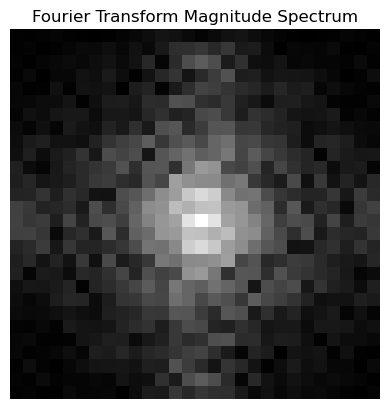

In [4]:
img = train_images[38574]

# Fourier transformunu uygulama
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)

# Fourier transformunun magnitüd spektrumunu kontrol etme
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)
        
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform Magnitude Spectrum')
plt.axis('off')
plt.show()


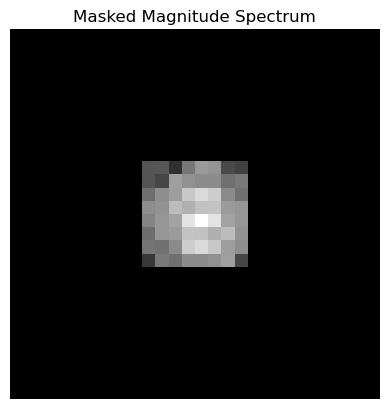

In [5]:
# Belirli bir frekans bandını çıkarmak için bir maske oluşturma
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
parameter = 0.25
size_row = round(crow*parameter)
size_col = round(ccol*parameter)
mask[crow - size_row:crow + size_row, ccol - size_col:ccol + size_col] = 1
        
# Maskeyi uygulama
f_transform_shifted_filtered = f_transform_shifted * mask

# Maskelenmiş magnitüd spektrumunu kontrol etme
magnitude_spectrum_filtered = np.log(np.abs(f_transform_shifted_filtered) + 1)
        
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Masked Magnitude Spectrum')
plt.axis('off')
plt.show()

c:\Users\emirr\anaconda3\envs\ML\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\emirr\anaconda3\envs\ML\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


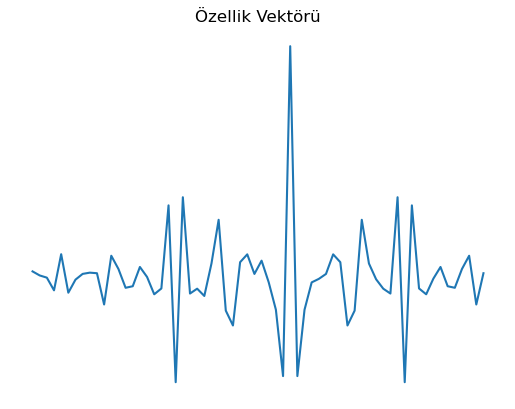

In [6]:
# Özellik vektörüne dönüştürme
f_transform_shifted_filtered_masked = f_transform_shifted_filtered[crow - size_row:crow + size_row, ccol - size_col:ccol + size_col]
feature_vector = f_transform_shifted_filtered_masked.flatten()
plt.plot(feature_vector)  # özellik vektörünü göster
plt.title('Özellik Vektörü')
plt.axis('off')
plt.show()

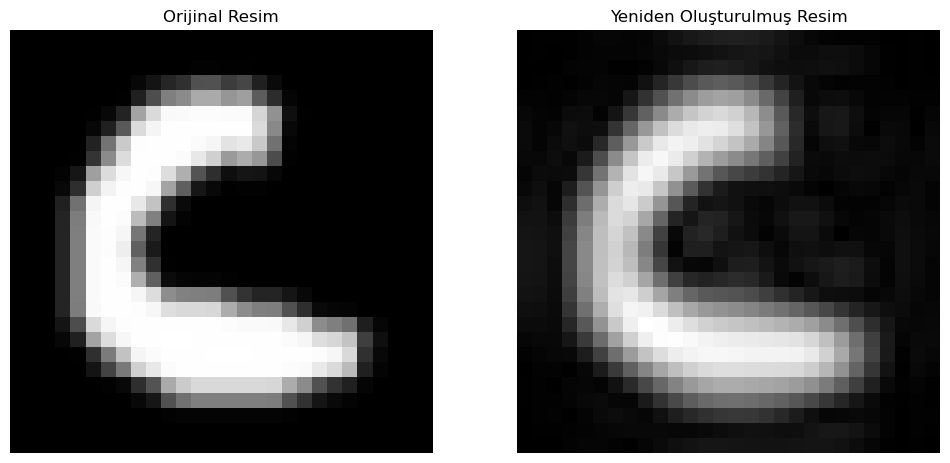

In [7]:
# Çıkarılan özellikleri ve ilk birkaç resmi görselleştirirme
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Resim')
plt.axis('off')
       
# Ters Fourier transformunu uygulama
f_transform_shifted = np.fft.ifftshift(f_transform_shifted_filtered)
reconstructed_img = np.fft.ifft2(f_transform_shifted)
reconstructed_img = np.abs(reconstructed_img)
    
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray') 
plt.title('Yeniden Oluşturulmuş Resim')
plt.axis('off')

plt.show()